# SMOTE untuk Klasifikasi Ketidakseimbangan


Klasifikasi yang tidak seimbang melibatkan pengembangan model prediktif pada kumpulan data klasifikasi yang memiliki ketidakseimbangan kelas yang parah.

Tantangan dalam bekerja dengan kumpulan data (*dataset*) yang tidak seimbang adalah bahwa sebagian besar teknik pembelajaran mesin (*machine learning*) akan diabaikan, dan pada gilirannya memiliki kinerja yang buruk pada kelas minoritas, meskipun biasanya kinerja pada kelas minoritaslah yang paling penting.

Salah satu pendekatan untuk mengatasi kumpulan data yang tidak seimbang adalah dengan mengambil sampel kelas minoritas secara berlebihan. Pendekatan paling sederhana melibatkan duplikasi contoh di kelas minoritas, meskipun contoh ini tidak menambahkan informasi baru ke model. Sebaliknya, contoh baru dapat disintesis dari contoh yang sudah ada. Ini adalah jenis augmentasi data untuk kelas minoritas dan disebut sebagai Teknik Oversampling Minoritas Sintetis (*Synthetic Minority Oversampling Technique*), atau disingkat SMOTE.

Disini kita akan menemukan SMOTE untuk oversampling kumpulan data (*dataset*) klasifikasi yang tidak seimbang.


Masalah dengan klasifikasi yang tidak seimbang adalah bahwa ada terlalu sedikit contoh kelas minoritas bagi model untuk mempelajari batas keputusan secara efektif.

Salah satu cara untuk mengatasi masalah ini adalah dengan ***oversample*** contoh di kelas minoritas. Ini dapat dicapai hanya dengan **menduplikasi contoh dari kelas minoritas dalam dataset pelatihan** sebelum menyesuaikan model. Ini dapat menyeimbangkan distribusi kelas tetapi tidak memberikan informasi tambahan apa pun ke model.

Perbaikan dalam menduplikasi contoh dari kelas minoritas adalah mensintesiskan contoh baru dari kelas minoritas. Ini adalah jenis augmentasi data untuk data tabular dan bisa sangat efektif.

Mungkin pendekatan yang paling banyak digunakan untuk mensintesis contoh baru disebut Teknik Oversampling Minoritas Sintetik, atau disingkat SMOTE. Teknik ini dijelaskan oleh Nitesh Chawla, et al. dalam makalah mereka tahun 2002 yang diberi nama untuk teknik berjudul "SMOTE: Teknik Over-sampling Minoritas Sintetis."

SMOTE bekerja dengan memilih contoh yang dekat di ruang fitur, menggambar garis di antara contoh di ruang fitur, dan menggambar sampel baru pada titik di sepanjang garis itu.

Secara khusus, contoh acak dari kelas minoritas dipilih terlebih dahulu. Kemudian k dari tetangga terdekat untuk contoh tersebut ditemukan (biasanya k=5). Tetangga yang dipilih secara acak dipilih dan contoh sintetik dibuat pada titik yang dipilih secara acak antara dua contoh di ruang fitur.

Langkah awal dengan melakukan instalasi modul library.


In [ ]:
pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Kita dapat mengonfirmasi bahwa penginstalan berhasil dengan mencetak versi library yang diinstal.


In [ ]:
# periksa version number
import imblearn
print(imblearn.__version__)


0.8.1


## SMOTE untuk Menyeimbangkan Data


Pada bagian ini, kita akan mengembangkan intuisi untuk SMOTE dengan menerapkannya pada masalah klasifikasi biner yang tidak seimbang.

Pertama, kita dapat menggunakan fungsi `make_classification()` dari scikit-learn untuk membuat kumpulan data (*dataset*) klasifikasi biner sintetik dengan 10.000 contoh dan distribusi kelas 1:100.


In [ ]:
# tentukan dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


Kita bisa menggunakan objek Counter untuk meringkas jumlah contoh di setiap kelas untuk mengkonfirmasi bahwa dataset telah dibuat dengan benar.


In [ ]:
# meringkas distribusi kelas (summarize class distribution)
counter = Counter(y)
print(counter)


Counter({0: 9900, 1: 100})


Terakhir, kita dapat membuat sebaran dataset dan mewarnai contoh untuk setiap kelas dengan warna yang berbeda untuk melihat dengan jelas sifat spasial dari ketidakseimbangan kelas.


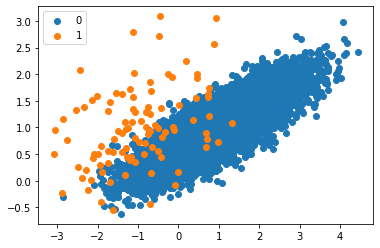

In [ ]:
# sebar plot contoh berdasarkan label kelas
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


Menjalankan contoh terlebih dahulu meringkas distribusi kelas, menegaskan rasio 1:100, dalam hal ini dengan sekitar 9.900 contoh di kelas mayoritas dan 100 di kelas minoritas.


In [16]:
Counter({0: 9900, 1: 100})


Counter({0: 9900, 1: 100})

Plot pencar (scatter plot) dari dataset dibuat menunjukkan massa besar titik-titik milik kelas mayoritas (biru) dan sejumlah kecil titik tersebar untuk kelas minoritas (oranye). Kita bisa melihat beberapa ukuran tumpang tindih antara kedua kelas.


## Teknik Penanganan Data yang Tidak Seimbang

Ada 2 algoritma utama yang banyak digunakan untuk menangani distribusi kelas yang tidak seimbang.

1.   SMOTE
2.   Near Miss Algorithm


**Langkah 1:** Menetapkan kelas minoritas set **A**, untuk setiap $x \in A$, **k-tetangga terdekat dari x** diperoleh dengan menghitung **jarak Euclidean** antara x dan setiap sampel lainnya di set **A**.

**Langkah 2:** Laju pengambilan sampel **N** diatur sesuai dengan proporsi yang tidak seimbang. Untuk setiap $x \in A$, **N** contoh (yaitu x1, x2, …xn) dipilih secara acak dari k-tetangga terdekatnya, dan mereka membuat set $A_1$ .

**Langkah 3:** Untuk setiap contoh $x_k \in A_1$ (k=1, 2, 3…N), rumus berikut digunakan untuk membuat contoh baru:
$x' = x + rand(0, 1) * \mid x - x_k \mid$
di mana rand(0, 1) mewakili angka acak antara 0 dan 1.


## Algoritma NearMiss – Undersampling

NearMiss adalah teknik under-sampling. Ini bertujuan untuk menyeimbangkan distribusi kelas dengan menghilangkan contoh kelas mayoritas secara acak. Ketika instance dari dua kelas yang berbeda sangat dekat satu sama lain, kami menghapus instance dari kelas mayoritas untuk menambah jarak antara kedua kelas. Ini membantu dalam proses klasifikasi.

Untuk mencegah masalah kehilangan informasi pada sebagian besar teknik pengambilan sampel di bawah, metode near-neighbor digunakan secara luas.


Intuisi dasar tentang cara kerja metode near-neighbor adalah sebagai berikut:

Langkah 1: Metode pertama menemukan jarak antara semua instance dari kelas mayoritas dan instance dari kelas minoritas. Di sini, kelas mayoritas menjadi sampel yang kurang.

Langkah 2: Kemudian, n instance dari kelas mayoritas yang memiliki jarak terkecil ke kelas minoritas dipilih.

Langkah 3: Jika ada k instance di kelas minoritas, metode terdekat akan menghasilkan k * n instance dari kelas mayoritas.


Untuk menemukan n instance terdekat di kelas mayoritas, ada beberapa variasi penerapan Algoritma NearMiss:

NearMiss – Versi 1 : Ini memilih sampel dari kelas mayoritas yang jarak rata-rata ke k contoh **terdekat** dari kelas minoritas adalah yang terkecil.

NearMiss – Versi 2 : Ini memilih sampel dari kelas mayoritas yang jarak rata-rata ke k contoh **terjauh** dari kelas minoritas adalah yang terkecil.

NearMiss – Versi 3 : Bekerja dalam 2 langkah. Pertama, untuk setiap instance kelas minoritas, **M tetangga terdekatnya** (*nearest-neighbors*) akan disimpan. Kemudian akhirnya, instance kelas mayoritas dipilih yang jarak rata-rata ke N tetangga terdekat adalah yang terbesar.


In [46]:
# import modul libraries
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


Dataset terdiri dari transaksi yang dilakukan oleh kartu kredit. Dataset ini memiliki 492 transaksi penipuan dari 284.807 transaksi. Itu membuatnya sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.


In [47]:
# load dataset
data = pd.read_csv('creditcard.csv')
  
# cetak info tentang kolom dalam dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64

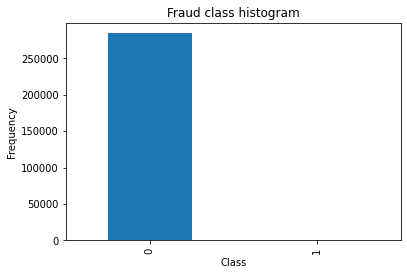

In [48]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

# seperti yang kita ketahui ada 492 transaksi fraud
data['Class'].value_counts()

In [49]:
# menormalkan kolom Amount
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))

# hapus kolom Time dan Amount karena tidak relevan untuk tujuan prediksi
data = data.drop(['Time', 'Amount'], axis = 1)


In [50]:
# Pisahkan data menjadi training set dan test set
from sklearn.model_selection import train_test_split

# pisahkan dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# gambarkan info tentang train dan test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (7000, 2)
Number transactions y_train dataset:  (7000,)
Number transactions X_test dataset:  (3000, 2)
Number transactions y_test dataset:  (3000,)


In [51]:
# Sekarang latih model tanpa menangani distribusi kelas yang tidak seimbang

# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2977
           1       1.00      0.43      0.61        23

    accuracy                           1.00      3000
   macro avg       1.00      0.72      0.80      3000
weighted avg       1.00      1.00      0.99      3000



Keakuratannya mencapai 100% tetapi apakah kita melihat sesuatu yang aneh?

Ingatan kelas minoritas sangat kurang. Ini membuktikan bahwa model tersebut lebih bias terhadap kelas mayoritas. Jadi, ini membuktikan bahwa ini bukan model terbaik.

Sekarang, kita akan menerapkan berbagai teknik penanganan data yang tidak seimbang dan melihat akurasi dan hasil penarikannya.


## Menggunakan Algoritma SMOTE


In [54]:
# pip install imblearn (jika kita belum memiliki imblearn dalam sistem kita)
!pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import modul SMOTE dari imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())        # dahulu fit_sample

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 77
Before OverSampling, counts of label '0': 6923 

After OverSampling, the shape of train_X: (13846, 2)
After OverSampling, the shape of train_y: (13846,) 

After OverSampling, counts of label '1': 6923
After OverSampling, counts of label '0': 6923


Lihat! bahwa Algoritma SMOTE telah oversampling instance minoritas dan membuatnya sama dengan kelas mayoritas. Kedua kategori memiliki jumlah catatan yang sama. Lebih khusus lagi, kelas minoritas telah ditingkatkan menjadi jumlah total kelas mayoritas.
Sekarang lihat akurasi dan hasil recall setelah menerapkan algoritma SMOTE (Oversampling).


In [56]:
# Prediksi dan Recall

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2977
           1       0.09      0.91      0.16        23

    accuracy                           0.93      3000
   macro avg       0.54      0.92      0.56      3000
weighted avg       0.99      0.93      0.96      3000



Wow, Kita telah mengurangi akurasi hingga 93% dibandingkan model sebelumnya tetapi nilai recall kelas minoritas juga meningkat menjadi 91%. Ini adalah model yang bagus dibandingkan dengan yang sebelumnya. Recall itu bagus.

Sekarang, kita akan menerapkan teknik NearMiss ke Under-sample kelas mayoritas dan melihat akurasi dan hasil recall-nya.


## NearMiss Algorithm


In [58]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# menerapkan algoritma near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())        # dahulu fit_sample

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))


Before Undersampling, counts of label '1': 77
Before Undersampling, counts of label '0': 6923 

After Undersampling, the shape of train_X: (154, 2)
After Undersampling, the shape of train_y: (154,) 

After Undersampling, counts of label '1': 77
After Undersampling, counts of label '0': 77


Algoritma NearMiss telah mengecilkan contoh mayoritas dan membuatnya sama dengan kelas mayoritas. Di sini, kelas mayoritas telah direduksi menjadi jumlah kelas minoritas, sehingga kedua kelas akan memiliki jumlah record yang sama.


In [59]:
# Prediksi dan Recall

# latih (train) model pada train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

# cetak classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2977
           1       0.49      0.78      0.60        23

    accuracy                           0.99      3000
   macro avg       0.74      0.89      0.80      3000
weighted avg       0.99      0.99      0.99      3000



Model ini masih kurang baik dibanding dari model pertama karena mengklasifikasikan lebih rendah dan juga nilai recall kelas minoritas adalah 78%. Dan juga karena oversampling kelas mayoritas, recall-nya menaik hingga 99%. Jadi dalam hal ini, SMOTE memberikan nilai akurasi dan recall yang ok, dan kita akan memilih untuk melanjutkan dan menggunakan model itu, SMOTE! 🙂
